In [1]:
from os import listdir
from os.path import isfile, join

import re
from itertools import combinations
from itertools import chain

import pandas as pd
import numpy as np

import geopandas as gpd
import geojson
import rtree

import folium.folium

import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium import plugins

%matplotlib inline

pd.set_option('display.max_rows', 1000)

In [21]:
BARRIOS_PATH = '../data/raw/callejero/barrios_madrid'
NUCLEOS_PATH = '../data/raw/callejero/nucleos'

In [22]:
barrios_mad = gpd.read_file(f"{BARRIOS_PATH}/barrios_madrid.shp")

display(barrios_mad.head())
display(barrios_mad.shape)

,CODBDT,GEOCODIGO,DESBDT,geometry
0,907409,079011,011 Palacio,"POLYGON ((439821.423 4474889.157, 439833.708 4..."
1,907410,079012,012 Embajadores,"POLYGON ((440369.412 4473937.262, 440380.549 4..."
2,907411,079013,013 Cortes,"POLYGON ((440872.264 4474491.446, 440909.644 4..."
3,907412,079014,014 Justicia,"POLYGON ((440920.102 4475481.029, 440924.669 4..."
4,907413,079015,015 Universidad,"POLYGON ((439586.516 4475753.323, 439594.830 4..."


(131, 4)

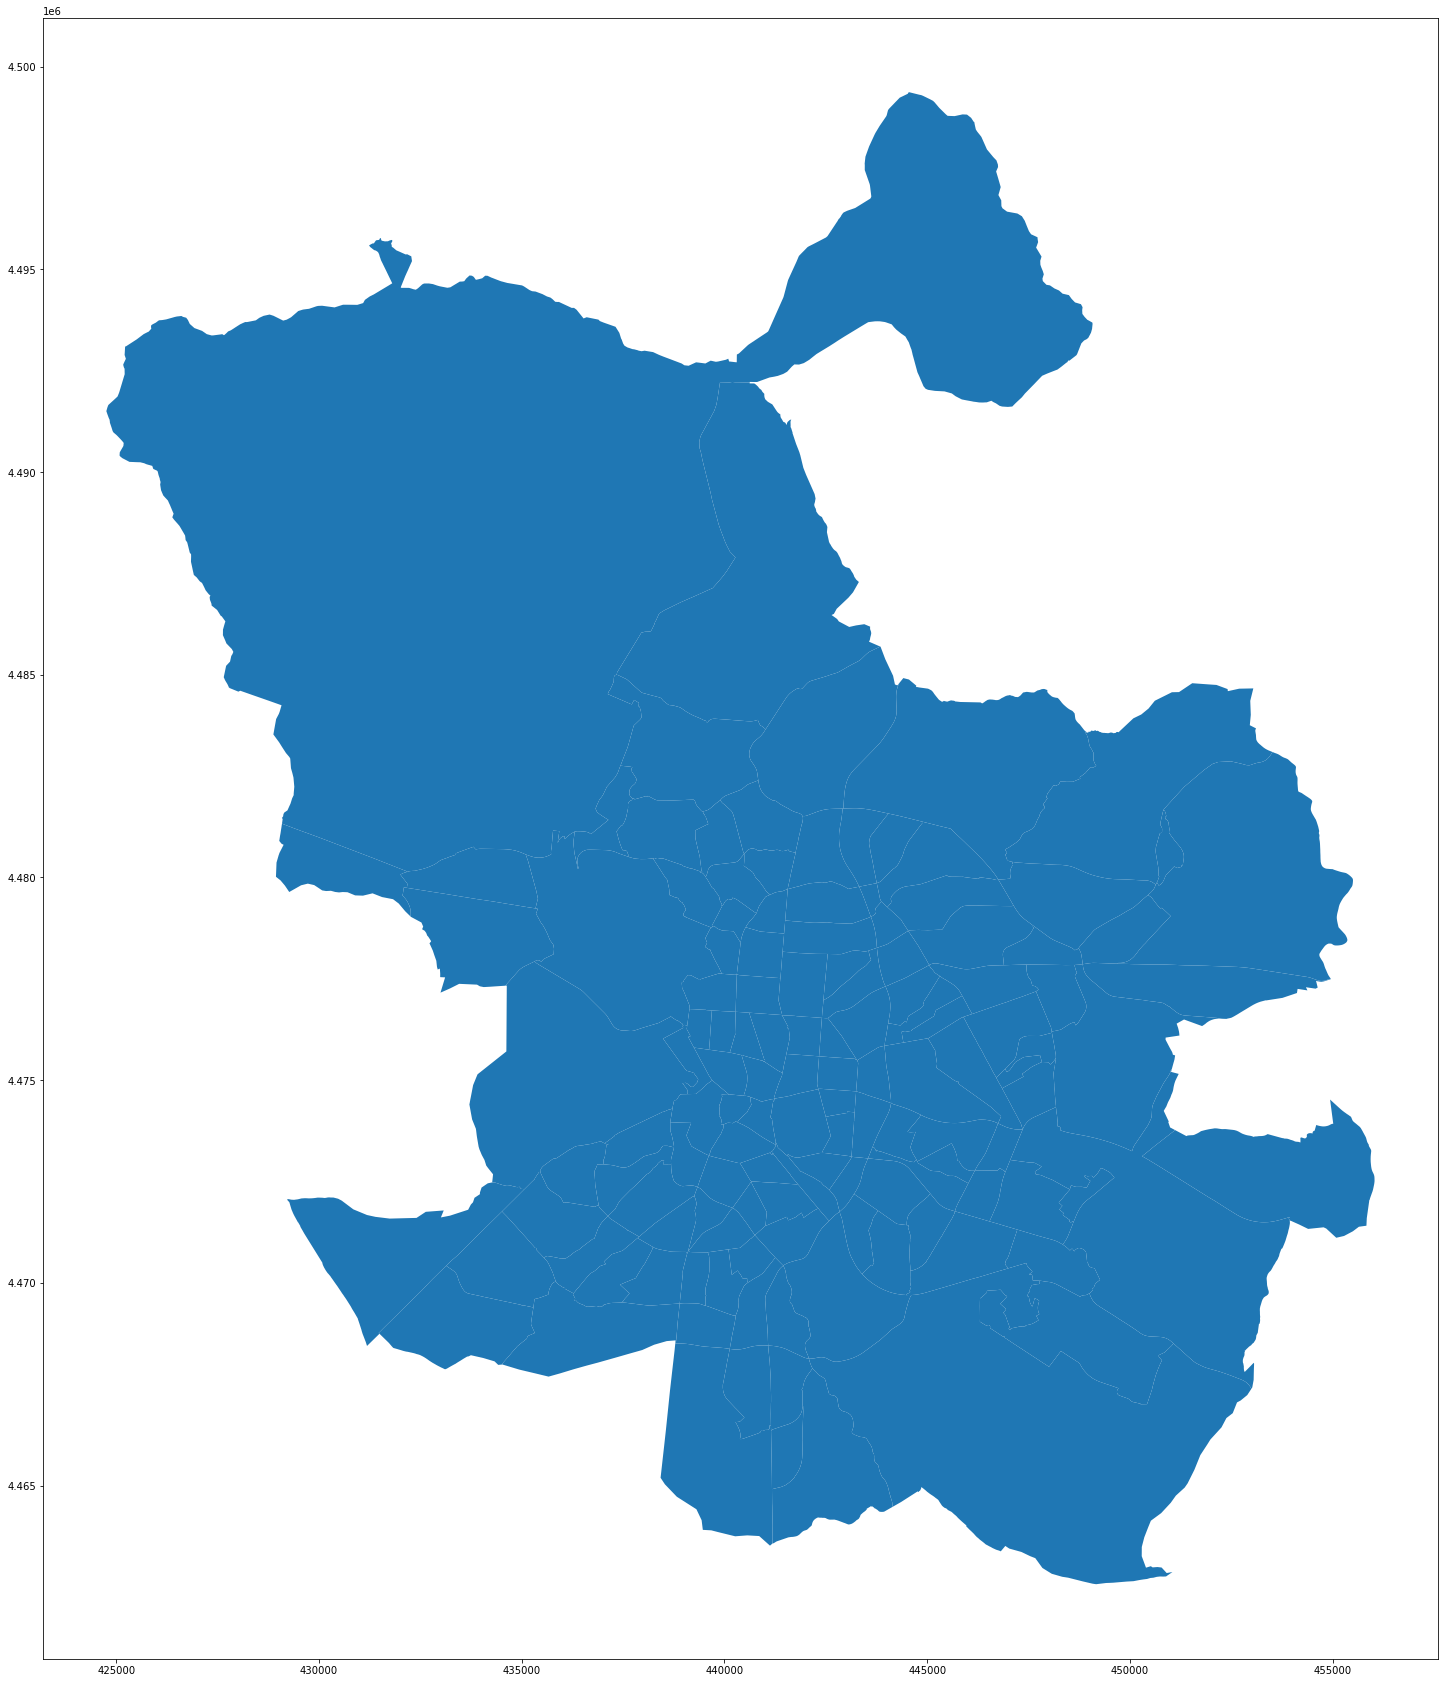

In [15]:
barrios_mad.plot(figsize = (25,35))
plt.show()

In [44]:
nucleos_mad = gpd.read_file(f"../data/raw/callejero/distritos/distritos.shp")

display(nucleos_mad.head())
display(nucleos_mad.shape)

,CODBDT,GEOCODIGO,DESBDT,geometry
0,907163,00101,001-01,"POLYGON ((446133.839 4552287.918, 446207.880 4..."
1,907164,00201,002-01,"POLYGON ((459091.640 4489528.637, 459091.357 4..."
2,907165,00301,003-01,"POLYGON ((427742.390 4533545.713, 427742.806 4..."
3,907166,00401,004-01,"POLYGON ((419147.879 4453241.602, 419482.126 4..."
4,907167,00501,005-01,"POLYGON ((469943.908 4481379.080, 469962.223 4..."


(246, 4)

In [43]:
## para codigos postales
def mad_code(x):
    if len(re.findall(r'280\d+', x)) != 0:
        return True
    else: return False

nucleos_mad['MAD'] = nucleos_mad['GEOCODIGO'].apply(mad_code)
filtr = nucleos_mad['MAD']
display(len(nucleos_mad[filtr]))

55

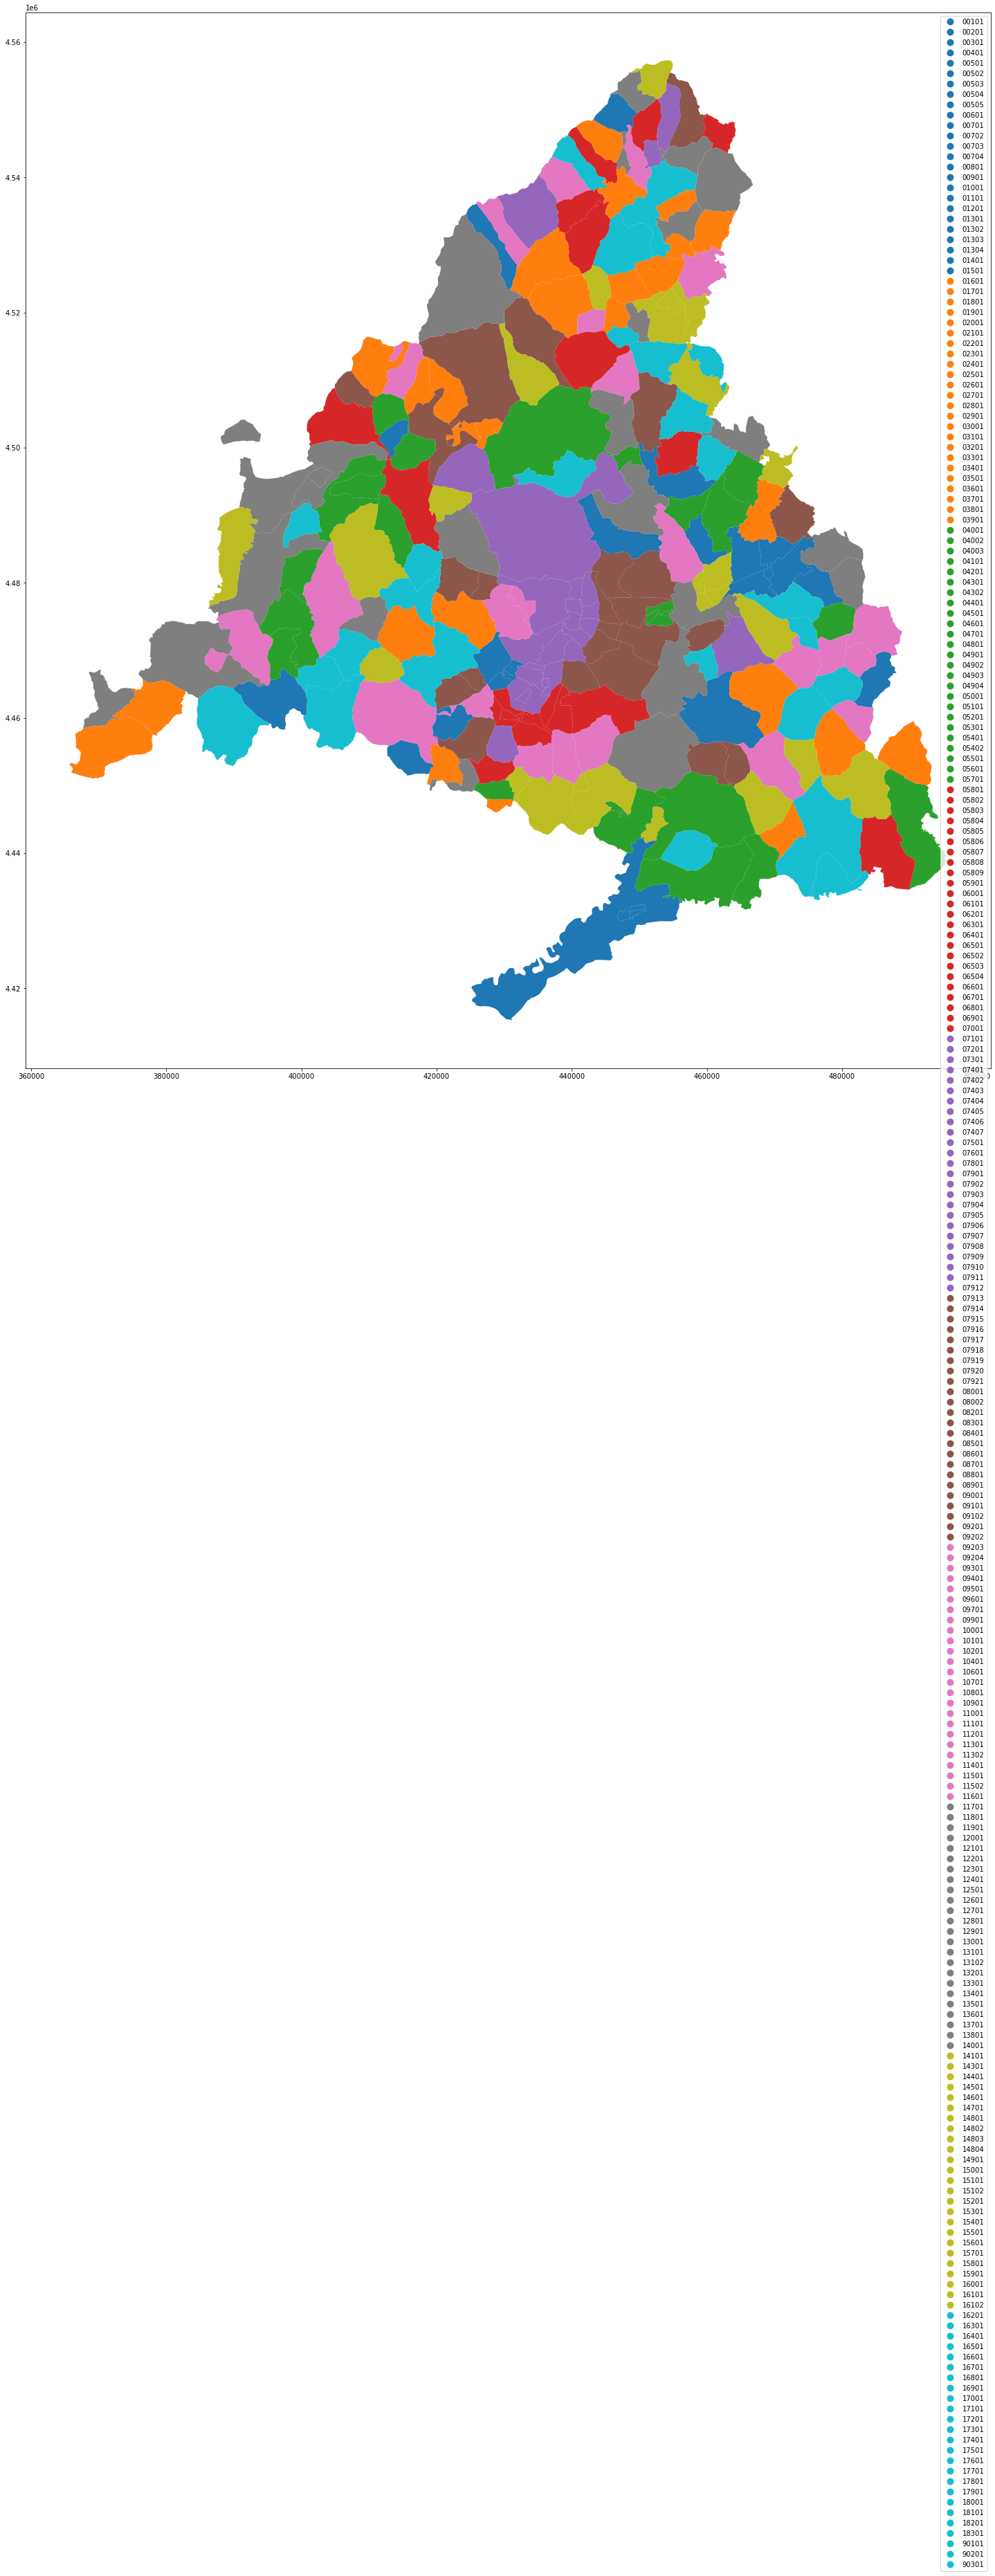

In [45]:
nucleos_mad.plot(figsize = (25,35), column = 'GEOCODIGO', legend = True)
plt.show()

In [47]:
callejero_mad = gpd.read_file(f"../data/raw/callejero/callejero_2019/call2019.shp")

display(callejero_mad.head())
display(callejero_mad.shape)

,CDMUNI,CDVIAL,CMUN,CODVI,VIA_TVIA,VIA_PART,VIA_LITE,NOMBRE,HISTORICO,VIA_CINE,geometry
0,001,00100008,001,00100008,Calle,del,Encerradero,Calle Encerradero,None,00008,"MULTILINESTRING ((447481.014 4548570.452, 4474..."
1,001,00100010,001,00100010,Calle,de la,Pasión de Cristo,Calle Pasión de Cristo,"Plaza, Calle",00010,"LINESTRING (447510.814 4548566.953, 447521.419..."
2,001,00100012,001,00100012,Calle,del,Puerto,Calle Puerto,None,00012,"MULTILINESTRING ((447713.146 4548503.942, 4476..."
3,001,00100019,001,00100019,Calle,de la,Plazuela,Calle Plazuela,None,00019,"MULTILINESTRING ((447605.391 4548455.247, 4476..."
4,001,00100020,001,00100020,Cmno,de,Braojos,Cmno Braojos,None,00020,"MULTILINESTRING ((447117.235 4546631.555, 4471..."


(48436, 11)

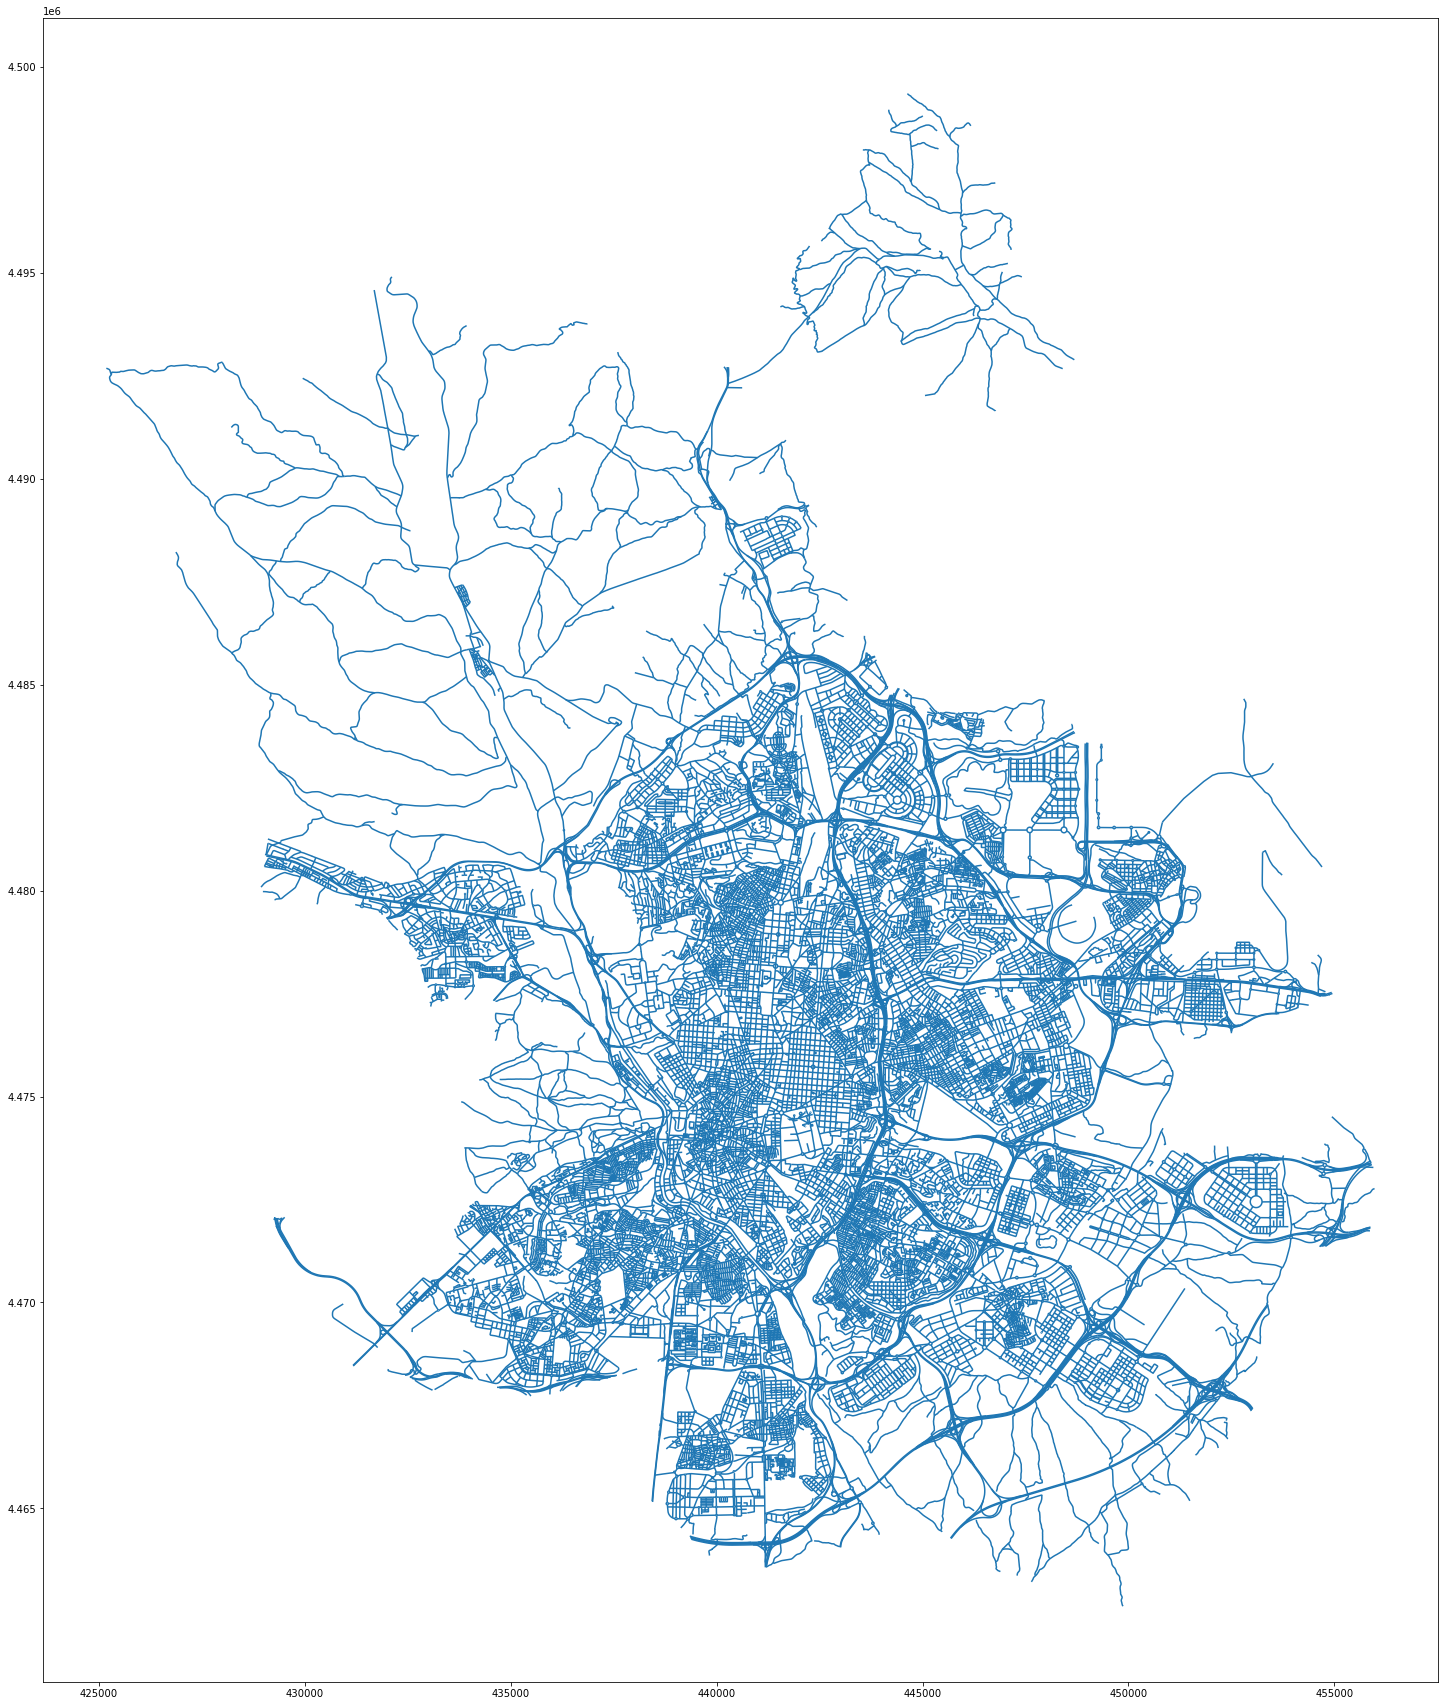

In [57]:
callejero_mad[callejero_mad['CDMUNI'] == '079'].plot(figsize = (25,35), )
plt.show()

In [58]:
callejero_mad[callejero_mad['CDMUNI'] == '079'].head()

,CDMUNI,CDVIAL,CMUN,CODVI,VIA_TVIA,VIA_PART,VIA_LITE,NOMBRE,HISTORICO,VIA_CINE,geometry
18646,079,07900003,079,07900003,Calle,de,Abada,Calle Abada,None,00003,"LINESTRING (440297.712 4474482.240, 440292.790..."
18647,079,07900004,079,07900004,Calle,de,Abades,Calle Abades,None,00004,"LINESTRING (440229.406 4473541.194, 440226.299..."
18648,079,07900005,079,07900005,Calle,de la,Abadesa,Calle Abadesa,None,00005,"LINESTRING (440291.441 4479559.424, 440291.628..."
18649,079,07900007,079,07900007,Calle,de,Ábalos,Calle Ábalos,None,00007,"MULTILINESTRING ((444410.004 4477875.044, 4444..."
18650,079,07900008,079,07900008,Calle,del,Abanico,Calle Abanico,None,00008,"LINESTRING (447255.063 4475423.613, 447256.254..."
